In [1]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import json
from itertools import product

## Load data

In [2]:
with open("/home/gab/TANGUE/examples/basename_db_test/_learn_db.json",'r') as file:
    dbdict = json.load(file)
# base

In [3]:
dbdict[list(dbdict.keys())[0]]
# "bin_fun" : 'nb_bb, nb_sites, nb_datasites'

{'__ctype_b_loc': '1,0,0',
 'iswprint': '1,0,0',
 'exit': '1,0,0',
 '__cxa_atexit': '1,0,0',
 'error': '1,0,0',
 'setlocale': '1,0,0',
 'malloc': '1,0,0',
 'calloc': '1,0,0',
 '__libc_start_main': '1,0,0',
 'memset': '1,0,0',
 'mbrtowc': '1,0,0',
 'getopt_long': '1,0,0',
 '__stack_chk_fail': '1,0,0',
 '__ctype_get_mb_cur_max': '1,0,0',
 'bindtextdomain': '1,0,0',
 'fclose': '1,0,0',
 '__fpending': '1,0,0',
 '__vfprintf_chk': '1,0,0',
 '.term_proc': '1,0,0',
 'atexit': '3,0,0',
 '__libc_csu_init': '3,0,0',
 'xalloc_die': '1,0,0',
 'xstrdup': '1,0,0',
 'xcalloc': '3,0,0',
 'x2nrealloc': '6,0,0',
 'textdomain': '1,0,0',
 'xrealloc': '4,0,0',
 '__libc_csu_fini': '1,0,0',
 'xnrealloc': '5,0,0',
 'xmalloc': '4,0,0',
 '.error': '1,0,0',
 '__gmon_start__': '1,0,0',
 '.__printf_chk': '1,0,0',
 'free': '1,0,0',
 'quotearg_n_style': '3,0,0',
 '__fprintf_chk': '1,0,0',
 '.mbsinit': '1,0,0',
 '.__stack_chk_fail': '1,0,0',
 '__do_global_dtors_aux': '2,0,0',
 'version_etc_va': '23,0,0',
 'close_stdou

## Fill X,Y lists

In [4]:
plots_list = []

### Basic blocks

In [5]:
X,Y = [], []
# X : nb_bb
# Y = nb_fun
tmp_list = []
for binname, bin_fun_dict in tqdm(dbdict.items()):
    for current_func, func_data in bin_fun_dict.items():
        tmp_list.append( int(func_data.split(",")[0]) )
X = [i for i in range(max(tmp_list)+1)]
Y = [tmp_list.count(j) for j in X]

mean = float(sum(Y))/len(bin_fun_dict)

plots_list.append((X,Y,mean,"BB per function distribution", "#BB", "#func"))

100%|███████████████████████████████| 357/357 [00:00<00:00, 13899.64it/s]


In [18]:
bin_fun_dict

{'__imp___gmon_start__': '1,0,0',
 '__ctype_b_loc': '1,0,0',
 'iswprint': '1,0,0',
 'mbsinit': '1,0,0',
 'getpagesize': '1,0,0',
 'strtoul': '1,0,0',
 '__printf_chk': '1,0,0',
 'setlocale': '1,0,0',
 'malloc': '1,0,0',
 'memcpy': '1,0,0',
 '__fprintf_chk': '1,0,0',
 'calloc': '1,0,0',
 'fputs_unlocked': '1,0,0',
 'xstrtoumax': '80,16,16',
 'xalloc_die': '1,0,0',
 '__gmon_start__': '1,0,0',
 'xzalloc': '4,0,0',
 '.iswprint': '1,0,0',
 'quotearg_buffer_restyled': '114,42,38',
 '__fxstat': '1,0,0',
 '.mbsinit': '1,0,0',
 'open': '1,0,0',
 'quotearg_n_style': '3,0,0',
 '.__fprintf_chk': '1,0,0',
 'x2realloc': '8,0,0',
 'dcgettext': '1,0,0',
 '.exit': '1,0,0',
 '.getpagesize': '1,0,0',
 '.init_proc': '3,0,0',
 '__vfprintf_chk': '1,0,0',
 '.memmove': '1,0,0',
 'realloc': '1,0,0',
 'start': '1,0,0',
 'full_read': '8,0,0',
 '.setlocale': '1,0,0',
 'frame_dummy': '4,0,0',
 'quotearg_alloc': '1,0,0',
 '.realloc': '1,0,0',
 'xnmalloc': '5,0,0',
 'strchr': '1,0,0',
 '.__fxstat': '1,0,0',
 'safe_re

In [17]:
print(X[:5],Y[:5])
print(tmp_list[:100])
print(sum(Y))
print(len(bin_fun_dict))

[0, 1, 2, 3, 4] [57753, 106, 127, 128, 82]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
59931
147


### Functions

In [7]:
X,Y = [], []
# X : nb_fun
# Y = nb_bin
tmp_list = []
for binname, bin_fun_dict in tqdm(dbdict.items()):
    tmp_list.append( len(bin_fun_dict) )
X = [i for i in range(max(tmp_list)+1)]
Y = [tmp_list.count(j) for j in X]

mean = float(sum(X))/len(dbdict)

plots_list.append((X,Y,mean,"Fun per bin distribution", "#fun", "#bin"))

100%|█████████████████████████████| 357/357 [00:00<00:00, 1501872.14it/s]


### Sites

In [8]:
X,Y = [], []
# X : nb_sites
# Y = nb_fun
tmp_list = []
for binname, bin_fun_dict in tqdm(dbdict.items()):
    for current_func, func_data in bin_fun_dict.items():
        tmp_list.append( int(func_data.split(",")[1]) )
X = [i for i in range(max(tmp_list)+1)]
Y = [tmp_list.count(j) for j in X]

mean = float(sum(Y))/len(bin_fun_dict)

plots_list.append((X,Y,mean,"Sites per fun distribution", "#Sites", "#fun"))

100%|███████████████████████████████| 357/357 [00:00<00:00, 17254.15it/s]


In [9]:
print(sum(Y))
print(len(bin_fun_dict))

59931
147


### Datasites

In [10]:
X,Y = [], []
# X : nb_fun
# Y = nb_bin
tmp_list = []
for binname, bin_fun_dict in tqdm(dbdict.items()):
    for current_func, func_data in bin_fun_dict.items():
        tmp_list.append( int(func_data.split(",")[2]) )
X = [i for i in range(max(tmp_list)+1)]
Y = [tmp_list.count(j) for j in X]

mean = float(sum(Y))/len(bin_fun_dict)

plots_list.append((X,Y,mean,"DataSites per fun distribution", "#DataSites", "#fun"))

100%|███████████████████████████████| 357/357 [00:00<00:00, 17153.73it/s]


## Plot

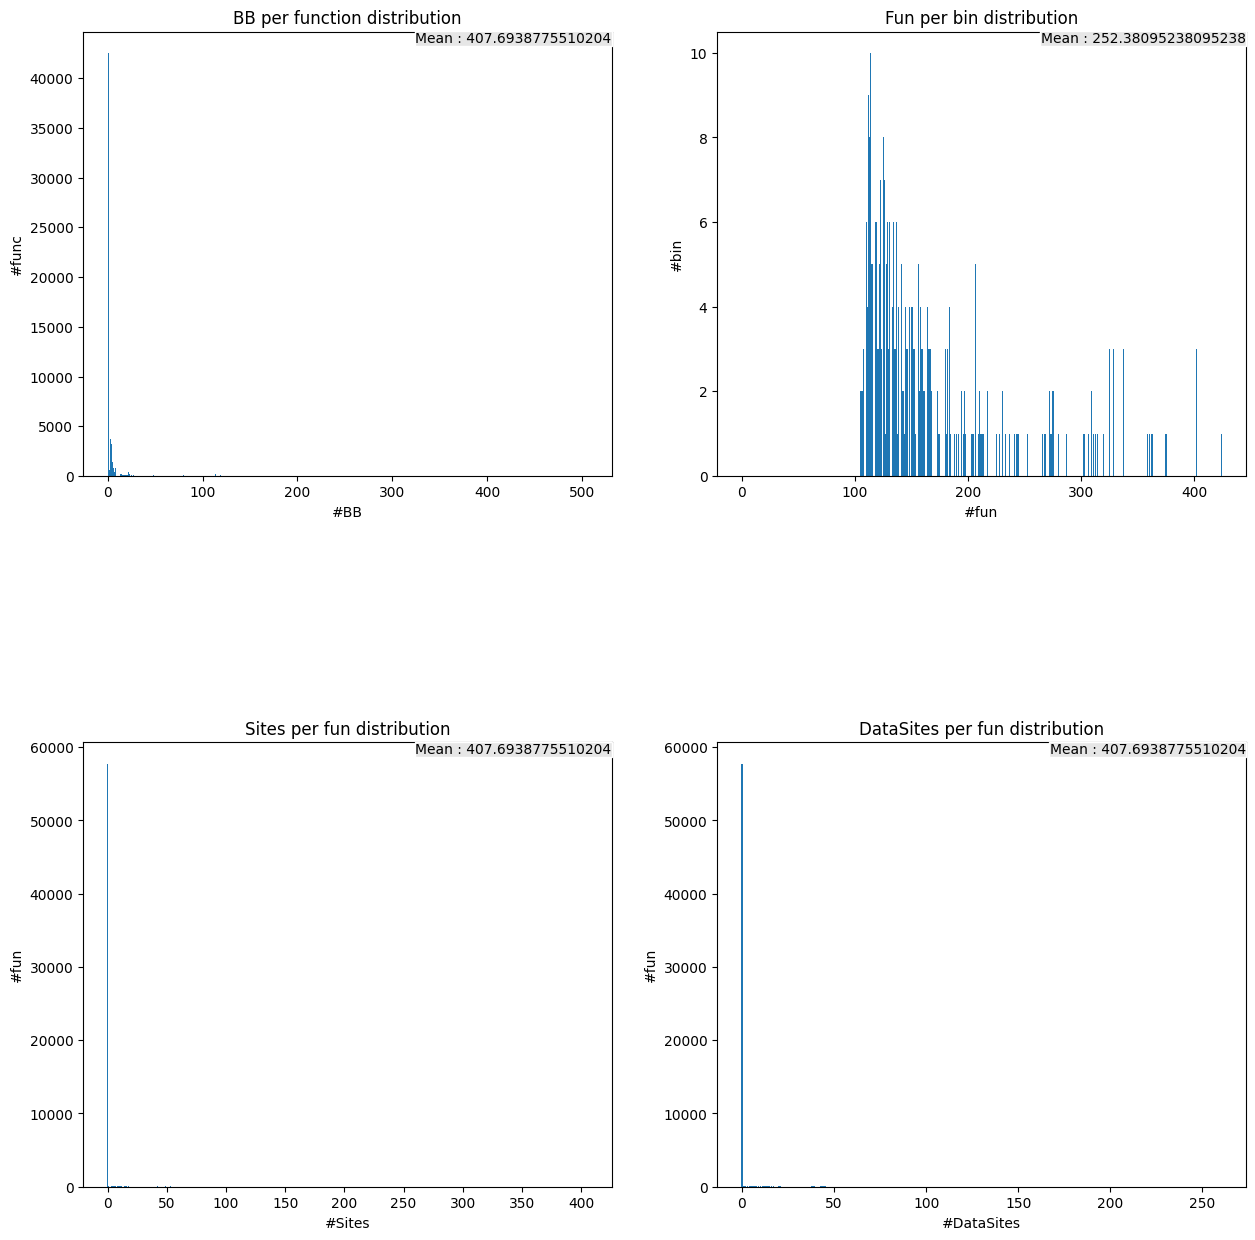

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
coordinates = list(product(list(range(2)), list(range(2))))

for i,cord in enumerate(coordinates):
    X = plots_list[i][0]
    Y = plots_list[i][1]
    mean = plots_list[i][2]
    title = plots_list[i][3]
    xlabel = plots_list[i][4]
    ylabel = plots_list[i][5]
    
    
    axes[cord].bar(plots_list[i][0], plots_list[i][1])
    axes[cord].set_title(title)
    axes[cord].set_xlabel(xlabel)
    axes[cord].set_ylabel(ylabel)

    axes[cord].text(1,1, ha = "right", va = "top",
                    bbox = dict(facecolor='0.9', edgecolor = '1', pad = 0.3),
                    transform = axes[cord].transAxes, s="Mean : {}".format(mean))
    

plt.subplots_adjust(hspace=0.6)
plt.show()